# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/CienciaDeDatos/02_Classification/fruit_data_with_colors.txt"

In [3]:
df = pd.read_table(path)

#Análsis básico

* Veamos la data

In [4]:
df.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


y será el labelm, que ya esta codificado

en x, quito fruit_subtype, que sería leakage, conociendo tipo, conozco color

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [6]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [7]:
df.fruit_name.unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [8]:
#creo datasets con cada fruta, para ver gráficamente que tan separables son

A = df[df["fruit_name"] == "apple"]
M = df[df["fruit_name"] == "mandarin"]
O = df[df["fruit_name"] == "orange"]
L = df[df["fruit_name"] == "lemon"]

* Scatter plot de las masas de las frutas

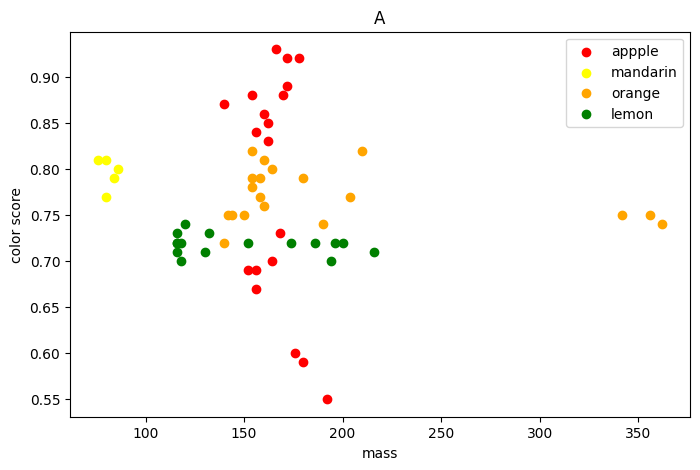

In [9]:
plt.figure(figsize = (8,5))
plt.scatter(A.mass, A.color_score, label = "appple", color = "red")
plt.scatter(M.mass, M.color_score, label = "mandarin", color = "yellow")
plt.scatter(O.mass, O.color_score, label = "orange", color = "orange")
plt.scatter(L.mass, L.color_score, label = "lemon", color = "green")

plt.legend()
plt.xlabel("mass")
plt.ylabel("color score")
plt.title("A")
plt.show()

* Matriz de correacion

* Observamos qué tan balanceado estpa el dataset

In [10]:
df["fruit_name"].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

# Entrenamiento

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
 X = df[["mass", "width", "height", "color_score"]]
 y = df["fruit_label"]

* Split train y test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 4)

* Creo modelo con 3 vecinos

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)

* Entreno

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

* Predigo

In [16]:
knn.score(X_test, y_test)

0.6666666666666666

* Para probar cuantos veciones meter, hago un for

In [17]:
# model complexity
neig = range(1,25)
test_accuracy = []

# loop over different values of k
for k in neig:
  # K from 1 to 25 (not incluxive)
  knn = KNeighborsClassifier (n_neighbors=k)

  #Fit with knn
  knn.fit(X_train, y_train)

  # ttest accuracy
  test_accuracy.append(knn.score(X_test, y_test))

* Grafiquemos

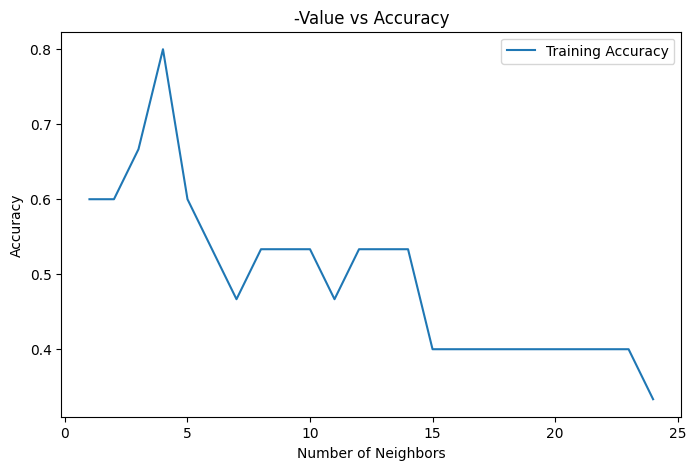

In [21]:
plt.figure(figsize=[8,5])
plt.plot(neig, test_accuracy, label = "Training Accuracy")
plt.legend()
plt.title("-Value vs Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

plt.show()

* Comunicquemos

In [18]:
test_accuracy = np.array(test_accuracy)

In [23]:
print("Best accuracy is {} with k = {}".format(test_accuracy.max(), test_accuracy.argmax()+1) )

Best accuracy is 0.8 with k = 4


# Hagamos el MVP (deploy), con la repdiccion y eso

In [25]:
#predicion = knn.predict()

In [ ]:
#array([2])

In [ ]:
#t_test.head(2)

# Mismo proceso, pero normlizando los datos

* Imports

In [26]:
from sklearn.preprocessing import StandardScaler

* Scaler

In [27]:
X = pd.DataFrame(StandardScaler().fit(X).transform(X))

In [28]:
X.head()

,0,1,2,3
0,0.529442,1.598690,-0.291397,-2.793595
1,0.309462,1.104854,-0.661922,-2.268684
2,0.236136,0.364100,-0.365502,-2.137456
3,-1.413709,-1.117409,-2.218131,0.487100
4,-1.450372,-1.364327,-2.292236,0.355872


* Volvemos a dejar los nombrs antiguos de las columnas

In [29]:
df.rename(columns={"0": "mass", "1":"width", "2":"height", "3":"color_score"}, inplace=True)

*Split train-test

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4)

* Entrenamiento y prueba

In [31]:
knn = KNeighborsClassifier(n_neighbors=4)

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [34]:
knn.score(X_test, y_test)

1.0

* Comprobacion

In [39]:
knn.predict(X_test.head(2))

array([2, 1])

In [48]:
y_test[0:2]

4     2
20    1
Name: fruit_label, dtype: int64